In [63]:
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
import pylab as pl
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

from IPython.display import clear_output

sns.set_style("whitegrid")
sns.set(rc={'axes.facecolor':'#e6fdcb', 'figure.facecolor':'#b6d699'})
sns.set(font_scale=1.25)
sns.set_style("whitegrid")


from scripts import *
from models import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [64]:
data = pd.read_csv("../Datasets/Avocado_prices_2020/avocado-updated-2020.csv", sep=",")

In [65]:
data.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


In [66]:
# Check null values
data.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [67]:
# Convert date to datetime format
data["date"] = pd.to_datetime(data["date"])

In [68]:
# Sort data by date
data = data.sort_values(["date"], ascending=[True]) 

In [69]:
# Consider data of the whole US
avocado_us = data[data["geography"]=="Total U.S."]

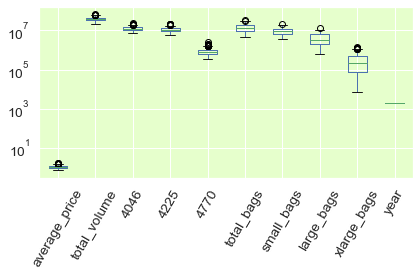

In [70]:
# Boxplot of the variables
fig = pl.figure()

sns.set(font_scale=1.25)
fig.patch.set_alpha(0.)

ax = fig.add_subplot(111)

sns.set(rc={'axes.facecolor':'#e6ffcc', 'figure.facecolor':'#b6d699'})
avocado_us[avocado_us["type"]=="conventional"].plot.box(ax=ax, rot=60)
ax.patch.set_facecolor('#e6ffcc')
ax.patch.set_alpha(1.)

ax.set_yscale("log")
pl.tight_layout()
fig.savefig('temp.png', facecolor=fig.get_facecolor(), dpi=200)

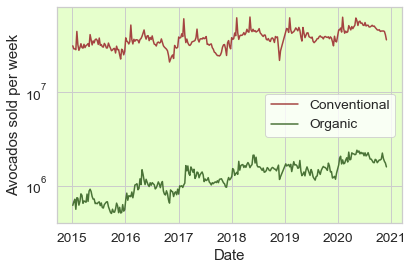

In [89]:
# Avocados sold per year
fig = pl.figure()
fig.patch.set_alpha(0.)
ax = fig.add_subplot(111)

plot_series(avocado_us[avocado_us["type"]=="conventional"][["date", "total_volume"]], ax, legend=["Conventional"])
plot_series(avocado_us[avocado_us["type"]=="organic"][["date", "total_volume"]], ax, legend=["Organic"])
ax.patch.set_facecolor('#e6ffcc')
sns.set(font_scale=1.25)
ax.patch.set_alpha(1.)


ax.set_yscale("log")
pl.ylabel("Avocados sold per week")
pl.tight_layout()
sns.set_style("whitegrid")
fig.savefig('temp.png', facecolor=fig.get_facecolor(), dpi=200)
pl.show()

In [72]:
# Growth of avocado sales per year
from scipy.optimize import curve_fit

def f(x, c0, a):
    return c0*a**x

avocado_type = "organic"
c = avocado_us[avocado_us["type"]==avocado_type][["total_volume"]].to_numpy().ravel()

years = len(c) / 52.1429
xdata = np.linspace(0, years, c.shape[0])
popt, _ = curve_fit(f, xdata, c)
print(f"Growth of {avocado_type} avocado per year: {(popt[1] - 1)*100} %")

Growth of organic avocado per year: 19.91002931744401 %


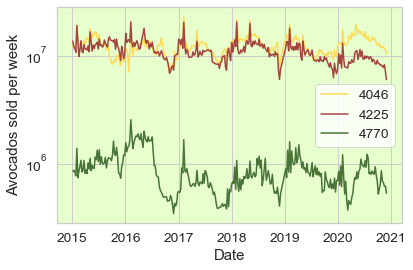

In [80]:
# Avocados sold by type over time
fig = pl.figure()

fig.patch.set_alpha(0.)

ax = fig.add_subplot(111)

plot_series(avocado_us[avocado_us["type"]=="conventional"][["date", "4046", "4225", "4770"]], ax)
ax.patch.set_facecolor('#e6ffcc')
sns.set(font_scale=1.25)
ax.patch.set_alpha(1.)

ax.set_yscale("log")
pl.ylabel("Avocados sold per week")
pl.tight_layout()
sns.set_style("whitegrid")
fig.savefig('temp.png', facecolor=fig.get_facecolor(), dpi=200)
pl.show()

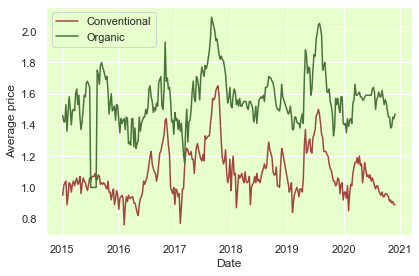

In [54]:
# Avocado price over time
fig = pl.figure()
fig.patch.set_alpha(0.)

ax = fig.add_subplot(111)

plot_series(avocado_us[avocado_us["type"]=="conventional"][["date", "average_price"]], ax, legend=["Conventional"])
plot_series(avocado_us[avocado_us["type"]=="organic"][["date", "average_price"]], ax, legend=["Organic"])
ax.patch.set_facecolor('#e6ffcc')
ax.patch.set_alpha(1.)

pl.ylabel("Average price")
pl.tight_layout()
fig.savefig('temp.png', facecolor=fig.get_facecolor(), dpi=200)
pl.show()

It seems that the Avocadopocalypse of 2017 was indeed real, the price grew to over 1.6$, a 50% increase from its mean of 1.08$

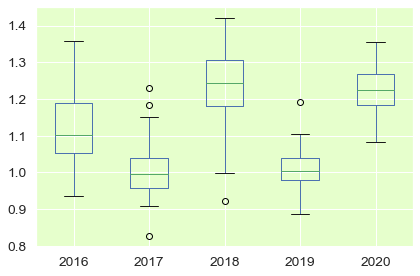

In [55]:
# Region by avocado sales
avocados_growth = pd.DataFrame(columns = set(data["geography"]))

for column in avocados_growth:
    region = data[(data["geography"]==column) & (data["type"]=="conventional")]
    avocados_per_year = region.groupby(region["date"].dt.year)["total_volume"].mean().to_numpy()
    avocados_growth[column] = avocados_per_year[1:] / avocados_per_year[:-1]

avocados_growth["year"] = np.sort(list(set(data["year"])))[1:]
avocados_growth = avocados_growth.set_index("year")

fig = pl.figure()

sns.set(font_scale=1.25)
fig.patch.set_alpha(0.)

ax = fig.add_subplot(111)

sns.set(rc={'axes.facecolor':'#e6ffcc', 'figure.facecolor':'#b6d699'})
avocados_growth.T.plot.box(ax=ax)
ax.patch.set_facecolor('#e6ffcc')
ax.patch.set_alpha(1.)

pl.tight_layout()
fig.savefig('temp.png', facecolor=fig.get_facecolor(), dpi=200)

## Gaussian process predictions

The power of the gaussian process is that it is hihly customizable by choosing different kernels or sum of kernels, furthermore it provides confidence bounds on predictions and any length predictions

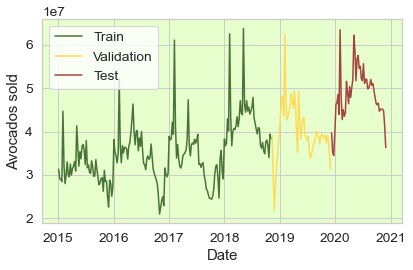

In [103]:
y = avocado_us[avocado_us["type"]=="conventional"][["total_volume"]].to_numpy()
x = avocado_us[avocado_us["type"]=="conventional"][["date"]].to_numpy()

y_train, y_test = y[:-52], y[-52:]
x_train, x_test = x[:-52], x[-52:]

x_train, x_val = x_train[:-52], x_train[-52:]
y_train, y_val = y_train[:-52], y_train[-52:]

fig = pl.figure()

fig.patch.set_alpha(0.)

ax = fig.add_subplot(111)

ax.plot(x_train, y_train, color=colors(), label="Train")
ax.plot(x_val, y_val, color=colors(), label="Validation")
ax.plot(x_test, y_test, color=colors(), label="Test")
ax.legend()
ax.patch.set_facecolor('#e6ffcc')
sns.set(font_scale=1.25)
ax.patch.set_alpha(1.)

ax.set_ylabel("Avocados sold")
ax.set_xlabel("Date")

sns.set_style("whitegrid")
pl.tight_layout()
fig.savefig('temp.png', facecolor=fig.get_facecolor(), dpi=200)

In [ ]:
from skopt import gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Integer, Categorical
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, \
           ExpSineSquared, ConstantKernel, Matern

In [107]:
y = avocado_us[avocado_us["type"]=="conventional"][["total_volume"]].to_numpy()
x = np.arange(y.shape[0], dtype=float).reshape(-1, 1)

y *= 1e-7
x *= 1e-2

y_train, y_test = y[:-52], y[-52:]
x_train, x_test = x[:-52], x[-52:]

In [108]:
x_train, x_val = x_train[:-52], x_train[-52:]
y_train, y_val = y_train[:-52], y_train[-52:]

In [225]:
model.kernel_

0.013**2 * Matern(length_scale=0.0471, nu=1.5) + 0.698**2 * Matern(length_scale=1.7, nu=1.5) * ExpSineSquared(length_scale=0.311, periodicity=1.04) + 0.637**2 * RationalQuadratic(alpha=2.4e+06, length_scale=1.2) + WhiteKernel(noise_level=0.323)

In [256]:
def plot_gp(model, x, t=None):
    if t is None: t = x
    y_pred, y_std = model.predict(x.reshape(-1, 1), return_std=True)

    y_pred = y_pred.ravel()

    pl.fill_between(t, y_pred - y_std, y_pred + y_std, alpha=0.5, color="k")
    pl.plot(t, y_pred, color=colors())

In [254]:
# General trend
k1 = ConstantKernel() * Matern()
# Year seasonality
k2 = ConstantKernel() * Matern() * ExpSineSquared()
# Mid term irregularities
k3 = ConstantKernel() * RationalQuadratic(alpha_bounds=(1e-9, 1e9))
# Noise
k4 = WhiteKernel()
kernel = k1+k2+k3+k4

model = GaussianProcessRegressor(kernel, n_restarts_optimizer=1, normalize_y=True).fit(x[:-52], y[:-52])

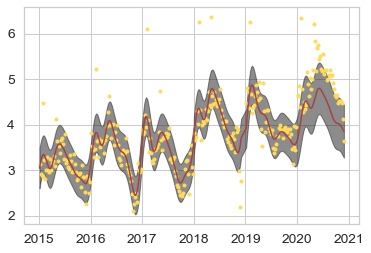

In [257]:
t = avocado_us[avocado_us["type"] == "conventional"]["date"].to_numpy()
pl.plot(t, y, ".", color=colors())
plot_gp(model, x.ravel(), t)

In [219]:
from sklearn.model_selection import TimeSeriesSplit

space  = [Real(1e-2, 1e2, "log-uniform", name='k1_constant'),
          Real(1e-2, 1e2, "log-uniform", name='k1_lengthscale'),
          Categorical([0.5, 1.5, 2.5, np.inf], name="k1_nu"),

          Real(1e-2, 1e2, "log-uniform", name='k2_constant'),
          Real(1e-2, 1e2, "log-uniform", name='k2_lengthscale'),
          Categorical([0.5, 1.5, 2.5, np.inf], name="k2_nu"),
          Real(1e-2, 1e2, "log-uniform", name='k2_sine_lengthscale'),
          Categorical([0.52, 1.04], name='k2_periodicity'),

          Real(1e-2, 1e2, "log-uniform", name='k3_constant'),
          Real(1e-2, 1e2, "log-uniform", name='k3_lengthscale'),
          Real(1e-8, 1e8, "log-uniform", name='k3_alpha')]


def create_kernel(params, fixed_bounds=False):
    bounds = "fixed" if fixed_bounds else (1e-5, 1e5)
    # General trend
    k1 = ConstantKernel(params["k1_constant"], bounds) * Matern(params["k1_lengthscale"], bounds, params["k1_nu"])
    # Year seasonality
    k2 = ConstantKernel(params["k2_constant"], bounds) * Matern(params["k2_lengthscale"], bounds, params["k2_nu"]) \
         * ExpSineSquared(params["k2_sine_lengthscale"], params["k2_periodicity"], bounds, bounds)
    # Mid term irregularities
    k3 = ConstantKernel(params["k3_constant"], bounds) * RationalQuadratic(params["k3_lengthscale"], params["k3_alpha"], bounds, bounds)
    # Noise
    k4 = WhiteKernel()
    
    return k1 + k2 + k3 + k4

@use_named_args(space)
def objective(**params):
    clear_output(wait=True)

    kernel = create_kernel(params, fixed_bounds=True)

    tscv = TimeSeriesSplit(n_splits=4, test_size=52)
    loss = 0.
    for train_index, test_index in tscv.split(x[:-52]):
        x_tr, x_te = x[train_index], x[test_index]
        y_tr, y_te = y[train_index], y[test_index]

        model = GaussianProcessRegressor(kernel, n_restarts_optimizer=0, normalize_y=True).fit(x_tr, y_tr)
        y_pred = model.predict(x_te)
        loss += np.mean((y_pred - y_te)**2)
    return loss

res_gp = gp_minimize(objective, space, n_calls=30, verbose=True, n_jobs=1)

Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 1.1031
Function value obtained: 1.9917
Current minimum: 1.5628


In [221]:
model.kernel_

0.24**2 * Matern(length_scale=78.8, nu=2.5) + 0.696**2 * Matern(length_scale=15.3, nu=2.5) * ExpSineSquared(length_scale=0.211, periodicity=1.04) + 2.72**2 * RationalQuadratic(alpha=202, length_scale=4.99) + WhiteKernel(noise_level=0.393)

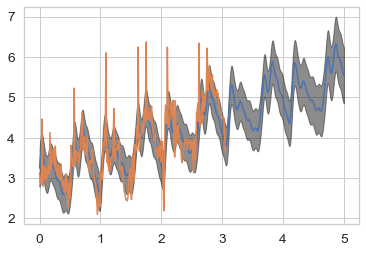

In [223]:
kernel = create_kernel(params_to_dict(space, res_gp), fixed_bounds=True)

model = GaussianProcessRegressor(kernel, n_restarts_optimizer=1, normalize_y=True).fit(x[:-52], y[:-52])

t = np.linspace(0, 5, 1000)
plot_gp(model, t.ravel())
pl.plot(x, y)

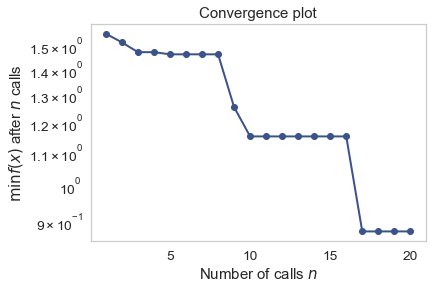

In [161]:
from skopt.plots import plot_convergence
plot_convergence(res_gp)
pl.yscale("log")

In [162]:
model.kernel_

8.18**2 * Matern(length_scale=14.6, nu=2.5) + 0.439**2 * Matern(length_scale=4.83, nu=0.5) * ExpSineSquared(length_scale=0.28, periodicity=1.04) + 3.14**2 * RationalQuadratic(alpha=9.15e-07, length_scale=0.0841) + WhiteKernel(noise_level=0.341)

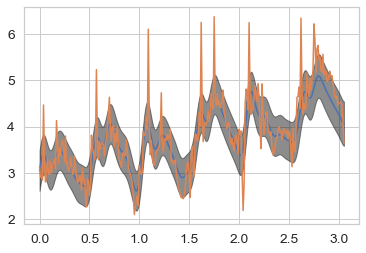

In [158]:
kernel = create_kernel(params_to_dict(space, res_gp), fixed_bounds=True)

model = GaussianProcessRegressor(kernel, n_restarts_optimizer=1, normalize_y=True).fit(x[:-52], y[:-52])

plot_gp(model, x.ravel())
pl.plot(x, y)

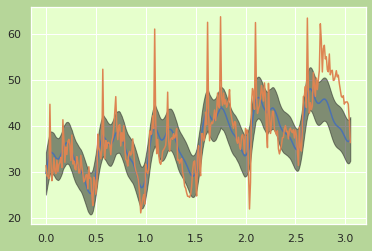

In [53]:
# General trend
k1 = ConstantKernel(0.009847046470162862, "fixed") * Matern(1.3776056445974685, "fixed", nu=1.5)
# Year seasonality
k2 = ConstantKernel(17.515722223970137, "fixed") * Matern(24.49957258073102, "fixed", nu=2.5) * ExpSineSquared(2.0872063839876716, 52*1e-2, "fixed")
# Mid term irregularities
k3 = ConstantKernel(1.2270786269373, "fixed") * RationalQuadratic(0.011692649823412426, 0.0013146815023358132, "fixed", "fixed")
# Noise
k4 = WhiteKernel()
kernel = k1+k2+k3+k4

model = GaussianProcessRegressor(kernel, n_restarts_optimizer=1, normalize_y=True).fit(x[:-52], y[:-52])

plot_gp(model, x.ravel())
pl.plot(x, y)